In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import math

In [47]:
df1 = pd.read_csv('housing.csv')

In [48]:
df2 = pd.read_csv('yachtData.csv')

In [49]:
df3 = pd.read_csv('concreteData.csv')

In [509]:
class LinearRegression:
    
    def __init__(self,X,y,lr, tol, maxIt, Lambda,error, gd =False, sgd = False, reg = False,) -> None:
        
        self.X=X
        self.y=y
        self.lr=lr
        self.tol=tol
        self.gd = gd
        self.Lambda = Lambda
        self.maxIt=maxIt
        self.sgd =sgd
        self.reg=reg
        self.error = error
        
        
    def trainTestSplit(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y , test_size = 0.3, random_state = 0)
        return X_train, X_test, y_train, y_test
    
# Putting an intercept line parallel to the axis. we generate a vector of ones  - bias, nump matrix
    def bias(self, X):
        return np.column_stack([np.ones([X.shape[0],1]),X])  # appending to X
    
    
#first normalize and then add column of 1
    def normalize(self,X):
        mean = np.mean(X,0)
        sd = np.std(X,0)
        X_norm = (X-mean)/sd
        X_norm = self.bias(X_norm)
        return X_norm, mean,sd
    
    def normalizeTestData(self,X,trainMean,trainSd):
        X_norm = (X-trainMean)/trainSd
        X_norm = self.bias(X_norm)
        return X_norm
    
# number of non zero singular values    
    def rank(self,X, eps = 1e-12):
        u, s ,vh = np.linalg.svd(X)
        return len([x for x in s if abs(X) > eps])
    
    def checkMatrix(self,X):
        
        X_rank = np.linalg.matrix_rank(X)
        if X_rank == min(X.shape[0], X.shape[1]): # no of rows & columns
            self.fullRank = True
            print('Data is Full Rank')
        else:
            self.fullRank = False
            print("Data is not Full Rank")
            
            
    def checkInvertibility(self,X):
        
        if X.shape[0] < X.shape[1]:
            self.lowRank = True
            print('Data is low rank')
        else:
            self.lowRank = False
            print("Data is not low rank")
            
    def closedFormSolution(self,X,y):
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return w
    
    def closedformsol_regularization(self,X,y):
        
        X_dim = self.bias(X)
        dimension = X_dim.shape[1]
        # Identity matrix of dimension should be same as the input matrix
        A = np.identity(dimension-1)
        w = np.linalg.inv((X.T).dot(X)+self.Lambda*A).dot(X.T).dot(y)
        return w
    
    
    
#theta-t = theta-t-1 -  alpha*gradient
    def gradientDescent(self, X, y):
        
        
        errorSequences =  []
        self.costValues = []
        last = float('inf')
        for i in tqdm(range(self.maxIt)):
            
    
            self.w = self.w - self.lr*self.costDerivative(X,y)
            cost = self.costFunction(X, y)
            self.costValues.append(cost)
            if self.error == 'rmse':
                curr = self.rmse(X, y)
            else:
                curr = self.sse(X,y)          
    
                
            diff = last-curr
            last = curr  
            errorSequences.append(curr)
            plt.plot(errorSequences)
            
            if diff < self.tol:
                
                print('Model stopped - no further improvement')
                break
        plt.xlabel("Iterations")
        plt.ylabel("Error")
        plt.title("Iterations vs Error")
        plt.plot(errorSequences)
                
    def graddescent_regularization(self,X,y):
        errorSequences = []
        self.costValues = []
        last = float('inf')
        for i in tqdm(range(self.maxIt)):
            self.w = self.w - self.lr*self.costDerivative_regularization(X,y)
            cost = self.costFunction(X,y)
            self.costValues.append(cost)
    
            if self.error == 'rmse':
                curr = self.rmse(X, y)
            else:
                curr = self.sse(X,y)
                
            diff = last-curr
            last = curr      
            errorSequences.append(curr)
            #plt.plot(errorSequences)
            
            if diff < self.tol:
                print('Model stopped - no further improvement')
                break
                
        plt.xlabel("Iterations")
        plt.ylabel("Error")
        plt.title("Iterations vs Error")
        plt.plot(errorSequences)
        
    def stochastic_graddescent(self,X,y,k):
        
        #b = random.sample(list(self.X), k)
        #X = np.array(b)    
        errorSequences = []
        self.costValues = []
        last = float('inf')
      
        for i in tqdm(range(self.maxIt)):
            b = random.sample(list(X), k)
            c = random.sample(list(y),k)
            y = np.array(c)
            X = np.array(b)
            for q,r in zip(X, y):
                
                self.w = self.w - self.lr*self.costDerivative(X,y)
                cost = self.costFunction(X, y)
                self.costValues.append(cost)
            
                if self.error == 'rmse':
                    curr = self.rmse(X, y)
                else:
                    curr = self.sse(X,y)
                
                diff = last-curr
                last = curr      
                errorSequences.append(curr)
                plt.plot(errorSequences)
            
                if diff < self.tol:
                    #print('Model stopped - no further improvement')
                    break
                
        plt.xlabel("Iterations")
        plt.ylabel("Error")
        plt.title("Iterations vs Error")
        plt.plot(errorSequences)


    def stochastic_graddescent_regularization(self,X,y,k):
        
        #b = random.sample(list(self.X), k)
        #X = np.array(b)    
        errorSequences = []
        self.costValues = []
        last = float('inf')
      
        for i in tqdm(range(self.maxIt)):
            b = random.sample(list(X), k)
            c = random.sample(list(y),k)
            y = np.array(c)
            X = np.array(b)
            for q,r in zip(X, y):
                
                self.w = self.w - self.lr*self.costDerivative_stochastic(X,y)
                cost = self.costFunction(X, y)
                self.costValues.append(cost)

                if self.error == 'rmse':
                    curr = self.rmse(X, y)
                else:
                    curr = self.sse(X,y)
                
                diff = last-curr
                last = curr      
                errorSequences.append(curr)
                #plt.plot(errorSequences)
            
                if diff < self.tol:
                    #print('Model stopped - no further improvement')
                    break
            plt.plot(errorSequences)

        
#ThetaT*xi     

    def predict(self,X):
        return X.dot(self.w)
        
    def sse(self,X,y):
        
        y_hat = self.predict(X)
        return ((y_hat-y)**2).sum()
    
    def rmse(self, X, y):
        return math.sqrt(self.sse(X,y)/y.size)
            
        
    def costFunction(self,X,y):
        return self.sse(X,y)/2
    
#xT(xtheta -y)    
    def costDerivative(self,X,y):
        y_hat = self.predict(X)
        return (y_hat - y).dot(X)
    
    def costDerivative_stochastic(self,X,y):
        yhat = self.predict(X)
        z = self.Lambda*(self.w)
        return (yhat - y).dot(X) + self.Lambda*(self.w**2)
    
    def costDerivative_regularization(self,X,y):
        yhat = self.predict(X)
        z = self.Lambda*(self.w)
        return (yhat - y).dot(X) + self.Lambda*(self.w**2)
        
    def fit(self):
        
        self.X_train, self.X_test, self.y_train, self.y_test = self.trainTestSplit()
        self.X_train, self.mean, self.sd = self.normalize(self.X_train)
        self.X_test = self.normalizeTestData(self.X_test, self.mean, self.sd)

        self.checkMatrix(self.X_train)
        self.checkInvertibility(self.X_train)
        
        
        if self.fullRank and not self.lowRank and not self.gd and not self.reg and not self.sgd:
        
            print('Solving using closed form sol')
            self.w = self.closedFormSolution(self.X_train, self.y_train)
            
        elif self.fullRank and not self.lowRank and not self.gd and self.reg and not self.sgd:
            print('Solving using closed form regularization')
            self.w = self.closedformsol_regularization(self.X_train, self.y_train)
            
        elif self.fullRank and not self.lowRank and not self.sgd and self.gd and self.reg:
            print('Solving using Gradient Descent with Regularization')
            self.w = np.ones(self.X_train.shape[1] ,dtype = np.float64) * 0
            self.graddescent_regularization(self.X_train,self.y_train)
            #self.plotCost()
            #plt.plot(errorSequences)

        elif self.fullRank and not self.lowRank and self.sgd and self.reg and not self.gd:
            print('Solving using Stochastic Gradient Descent with Regularization')
            #self.x_train = np.squeeze(np.asarray(self.X_train))
            #self.w=np.zeros(shape=(self.x_train.shape[1]-1,1))
            self.w = np.ones(self.X_train.shape[1] ,dtype = np.float64) * 0
            self.stochastic_graddescent_regularization(self.X_train,self.y_train, k=10)
            
        elif self.fullRank and not self.lowRank and self.sgd and not self.reg and not self.gd:
            print('Solving using Stochastic Gradient Descent')
            self.w = np.ones(self.X_train.shape[1] ,dtype = np.float64) * 0
            self.stochastic_graddescent(self.X_train,self.y_train, k=10)
            #self.plotCost()
            
        else:
            
            print("Solving using gradient descent")
            self.w = np.ones(self.X_train.shape[1] ,dtype = np.float64) * 0
            self.gradientDescent(self.X_train,self.y_train)
            
            #print(self.w)
        
       # print(self.w)
        
        
        
        sse = self.sse(self.X_test, self.y_test)
        rmse = self.rmse(self.X_test, self.y_test)
        print("\nSSE:",  sse)
        print("RMSE:", rmse )
        
        print("\n Final Theta's\n")
        print(self.w)
        

        


HOUSING CSV

In [515]:
regression = LinearRegression(df1.values[:,0:-1], df1.values[:,-1],Lambda = 0.001 ,lr = 0.0004, tol = 0.005, maxIt = 1500, gd=False ,reg=False,error='rmse')
regression.fit()


Data is Full Rank
Data is not low rank
Solving using closed form sol

SSE: 3250.004410789339
RMSE: 4.624025082730341

 Final Theta's

[22.93399433 -0.90751811  1.04796575  0.38867104  0.6622465  -2.17214484
  2.58716716  0.50645061 -2.59559964  2.30818886 -1.67320027 -2.33651383
  0.65618617 -3.99472177]


In [516]:
regressiona = LinearRegression(df1.values[:,0:-1], df1.values[:,-1],Lambda = 0.001 ,lr = 0.0004, tol = 0.005, maxIt = 1500, gd=False ,reg=True,error='rmse')
regressiona.fit()

Data is Full Rank
Data is not low rank
Solving using closed form regularization

SSE: 3250.003244845508
RMSE: 4.624024253292389

 Final Theta's

[22.93392937 -0.9075087   1.04794718  0.38863798  0.66225127 -2.1721009
  2.58718049  0.50642973 -2.59557244  2.308099   -1.67312074 -2.33650137
  0.65618524 -3.99469858]


  2%|█▌                                                                             | 30/1500 [00:00<00:02, 728.49it/s]

Data is Full Rank
Data is not low rank
Solving using gradient descent
Model stopped - no further improvement

SSE: 3395.2834933710237
RMSE: 4.7262449580778965

 Final Theta's

[22.72928728 -0.71502389  0.61050987 -0.1830346   0.76362304 -0.9822018
  3.11998658  0.04996472 -1.84225699  0.70895661 -0.3872768  -2.1058927
  0.66462073 -3.52549145]


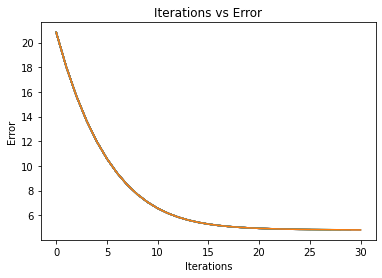

In [521]:
regressionb = LinearRegression(df1.values[:,0:-1], df1.values[:,-1],Lambda = 0.001 ,lr = 0.0004, tol = 0.005, maxIt = 1500, gd=True ,reg=False,error='rmse')
regressionb.fit()

  2%|█▌                                                                           | 30/1500 [00:00<00:00, 10794.30it/s]

Data is Full Rank
Data is not low rank
Solving using Gradient Descent with Regularization
Model stopped - no further improvement

SSE: 3395.2870967253866
RMSE: 4.726247466017352

 Final Theta's

[22.72915163 -0.71502355  0.61051003 -0.18303455  0.76362281 -0.9822023
  3.11998049  0.04996587 -1.8422586   0.70895737 -0.38727625 -2.1058946
  0.66462015 -3.5254986 ]


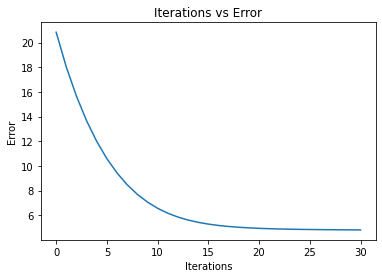

In [530]:
regressionc = LinearRegression(df1.values[:,0:-1], df1.values[:,-1],Lambda = 0.0001 ,lr = 0.0004, tol = 0.005, maxIt = 1500, gd=True ,reg=True,error='rmse')
regressionc.fit()

  2%|█▋                                                                             | 33/1500 [00:00<00:04, 320.69it/s]

Data is Full Rank
Data is not low rank
Solving using Stochastic Gradient Descent


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:07<00:00, 207.80it/s]



SSE: 16787.03658699024
RMSE: 10.509092738080076

 Final Theta's

[20.51212081  0.85779343 -0.5614165  -1.2775032   0.699992   -0.5627499
  0.3184421  -0.59159032  0.63578302  0.84208289 -2.31154861 -0.74337023
  7.75668179  1.81846296]


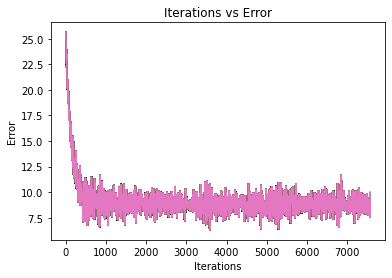

In [513]:
regressionc = LinearRegression(df1.values[:,0:-1], df1.values[:,-1],Lambda = 0.0001 ,lr = 0.0004, tol = 0.005, maxIt = 1500, sgd=True ,reg=False,error='rmse')
regressionc.fit()

  9%|███████▏                                                                     | 140/1500 [00:00<00:00, 1393.78it/s]

Data is Full Rank
Data is not low rank
Solving using Stochastic Gradient Descent with Regularization


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 972.25it/s]



SSE: 15123.37517172563
RMSE: 9.974762618111201

 Final Theta's

[17.25419751 -0.58381255 -2.76439365  1.15581321  2.05622972 -0.63334471
 -0.53028689 -0.69055773  0.59183805 -0.2064404  -3.79515727 -1.67090374
 -4.41042097 -3.07093952]


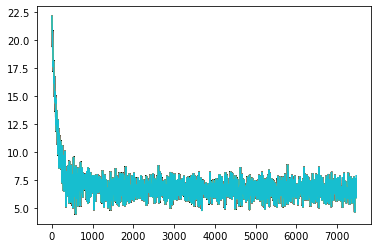

In [514]:
regressiond = LinearRegression(df1.values[:,0:-1], df1.values[:,-1],Lambda = 0.0001 ,lr = 0.0004, tol = 0.005, maxIt = 1500, sgd=True ,reg=True,error='rmse')
regressiond.fit()

In [494]:
regression.rmse(regression.X_test, regression.y_test)
#regression.sse(regression.X_test, regression.y_test)

9.375686348395242

YACHT CSV

In [519]:
regression2 = LinearRegression(df2.values[:,0:-1], df2.values[:,-1],Lambda = 0.001 ,lr = 0.001, tol = 0.001, maxIt =1500, gd=False,reg=False,error='rmse')
regression2.fit()

Data is Full Rank
Data is not low rank
Solving using closed form sol

SSE: 7619.253689071977
RMSE: 9.0513788464675

 Final Theta's

[10.74271028  0.54271589 -0.48644592  0.53145418 -0.58852203 -0.84401335
 12.89451446]


In [520]:
regression2a = LinearRegression(df2.values[:,0:-1], df2.values[:,-1],Lambda = 0.001 ,lr = 0.001, tol = 0.001, maxIt =1500, gd=False,reg=True,error='rmse')
regression2a.fit()

Data is Full Rank
Data is not low rank
Solving using closed form regularization

SSE: 7619.222182092549
RMSE: 9.051360131911352

 Final Theta's

[10.74266008  0.54271106 -0.48655894  0.53098641 -0.58814081 -0.84356367
 12.89445137]


  1%|█                                                                              | 19/1500 [00:00<00:02, 510.36it/s]

Data is Full Rank
Data is not low rank
Solving using gradient descent
Model stopped - no further improvement

SSE: 7569.435629912171
RMSE: 9.021739353738697

 Final Theta's

[10.65570116  0.54860892 -0.64086545 -0.1248648  -0.05651829 -0.2141502
 12.78556211]


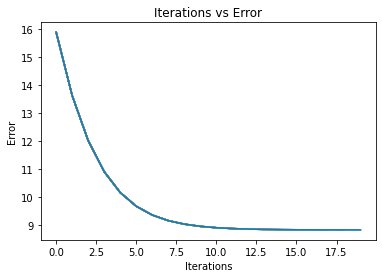

In [522]:
regression2b = LinearRegression(df2.values[:,0:-1], df2.values[:,-1],Lambda = 0.001 ,lr = 0.001, tol = 0.001, maxIt =1500, gd=True,reg=False,error='rmse')
regression2b.fit()

  1%|▉                                                                             | 19/1500 [00:00<00:00, 9482.60it/s]

Data is Full Rank
Data is not low rank
Solving using Gradient Descent with Regularization
Model stopped - no further improvement

SSE: 7569.12612662045
RMSE: 9.021554908906415

 Final Theta's

[10.65520834  0.54862361 -0.64086741 -0.12486877 -0.05651006 -0.2141511
 12.78485223]


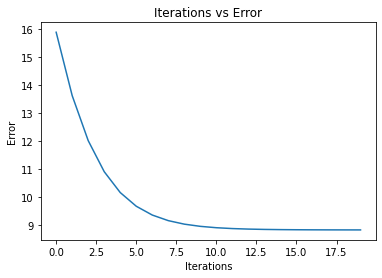

In [523]:
regression2c = LinearRegression(df2.values[:,0:-1], df2.values[:,-1],Lambda = 0.001 ,lr = 0.001, tol = 0.001, maxIt =1500, gd=True,reg=True,error='rmse')
regression2c.fit()

  1%|█▏                                                                             | 22/1500 [00:00<00:07, 210.77it/s]

Data is Full Rank
Data is not low rank
Solving using Stochastic Gradient Descent


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:09<00:00, 158.25it/s]



SSE: 21188.81228346409
RMSE: 15.0942602077758

 Final Theta's

[15.70422788  0.36607034  3.44662755  0.23167663  1.84840027 -0.3086145
  1.37239193]


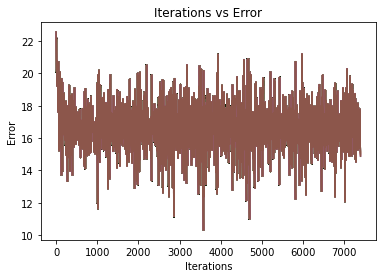

In [536]:
regression2d = LinearRegression(df2.values[:,0:-1], df2.values[:,-1],Lambda = 0.001 ,lr = 0.001, tol = 0.001, maxIt =1500, sgd=True,reg=False,error='rmse')
regression2d.fit()

  6%|████▉                                                                          | 94/1500 [00:00<00:01, 937.75it/s]

Data is Full Rank
Data is not low rank
Solving using Stochastic Gradient Descent with Regularization


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 804.50it/s]



SSE: 21042.347504869955
RMSE: 15.042001234132178

 Final Theta's

[ 6.65784535  2.09241808 -0.93304749  0.03425315  0.33456495 -1.94806552
 -0.40486911]


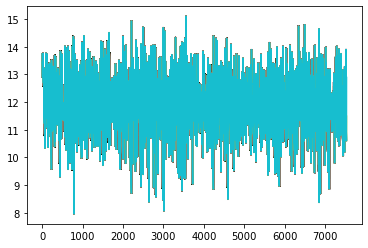

In [525]:
regression2e = LinearRegression(df2.values[:,0:-1], df2.values[:,-1],Lambda = 0.001 ,lr = 0.001, tol = 0.001, maxIt =1500, sgd=True,reg=True,error='rmse')
regression2e.fit()

CONCRETE CSV

In [527]:
regression3 = LinearRegression(df3.values[:,0:-1], df3.values[:,-1],Lambda = 0.001 ,lr = 0.0007, tol = 0.0001, maxIt = 1500, gd=False,reg=False ,error=None)
regression3.fit()

Data is Full Rank
Data is not low rank
Solving using closed form sol

SSE: 38115.41391778253
RMSE: 11.1063429671002

 Final Theta's

[35.55869444 13.07061719  9.29612788  6.07754028 -2.38797659  2.13444427
  1.74782814  1.75752107  7.36636378]


In [528]:
regression3a = LinearRegression(df3.values[:,0:-1], df3.values[:,-1],Lambda = 0.001 ,lr = 0.0007, tol = 0.0001, maxIt = 1500, gd=False,reg=True ,error=None)
regression3a.fit()

Data is Full Rank
Data is not low rank
Solving using closed form regularization

SSE: 38115.38197341631
RMSE: 11.106338313009834

 Final Theta's

[35.55864506 13.07034278  9.29585262  6.07729726 -2.38816303  2.13444327
  1.74763946  1.75727736  7.36634234]


 24%|██████████████████▏                                                          | 355/1500 [00:00<00:00, 1708.03it/s]

Data is Full Rank
Data is not low rank
Solving using gradient descent


 30%|███████████████████████                                                       | 443/1500 [00:01<00:02, 415.75it/s]

Model stopped - no further improvement

SSE: 38114.97700329399
RMSE: 11.106279311277472

 Final Theta's

[35.55869444 13.06540412  9.29085934  6.07298081 -2.39238759  2.13389392
  1.74374962  1.75244069  7.36620932]


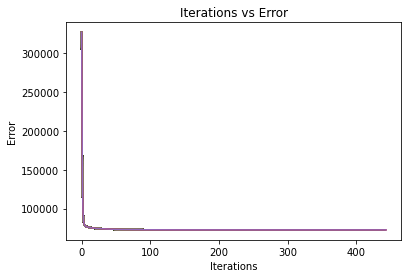

In [537]:
regression3b = LinearRegression(df3.values[:,0:-1], df3.values[:,-1],Lambda = 0.001 ,lr = 0.0007, tol = 0.0001, maxIt = 1500, gd=True,reg=False ,error=None)
regression3b.fit()

 31%|███████████████████████▎                                                    | 459/1500 [00:00<00:00, 17923.04it/s]

Data is Full Rank
Data is not low rank
Solving using Gradient Descent with Regularization
Model stopped - no further improvement

SSE: 38114.81318626724
RMSE: 11.10625544402432

 Final Theta's

[35.55693848 13.06371062  9.2892361   6.07152825 -2.39336567  2.13400543
  1.7427394   1.75108116  7.36607483]


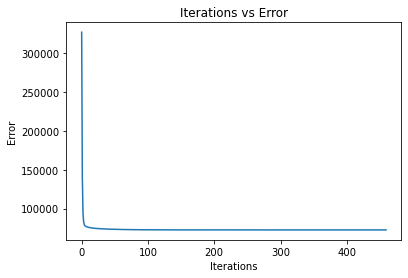

In [531]:
regression3c = LinearRegression(df3.values[:,0:-1], df3.values[:,-1],Lambda = 0.001 ,lr = 0.0007, tol = 0.0001, maxIt = 1500, gd=True,reg=True ,error=None)
regression3c.fit()

  2%|█▌                                                                             | 29/1500 [00:00<00:05, 276.38it/s]

Data is Full Rank
Data is not low rank
Solving using Stochastic Gradient Descent


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:11<00:00, 133.87it/s]



SSE: 60637.4171399441
RMSE: 14.008482998602997

 Final Theta's

[36.8337995   0.90938258  1.22425996 -0.77859361 -0.97220849  2.42232981
 -0.6838631   1.6905773   4.45962238]


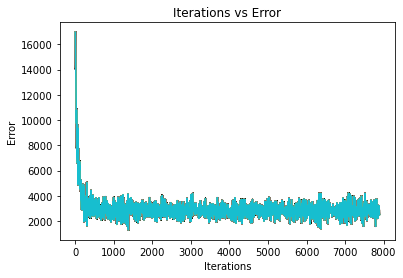

In [532]:
regression3d = LinearRegression(df3.values[:,0:-1], df3.values[:,-1],Lambda = 0.001 ,lr = 0.0007, tol = 0.0001, maxIt = 1500, sgd=True,reg=False ,error=None)
regression3d.fit()

  8%|██████▎                                                                      | 122/1500 [00:00<00:01, 1210.88it/s]

Data is Full Rank
Data is not low rank
Solving using Stochastic Gradient Descent with Regularization


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:02<00:00, 710.36it/s]



SSE: 96661.90896714845
RMSE: 17.686766574696303

 Final Theta's

[38.13823691 -0.90216771  4.00435349  3.28743936 -0.13203452  0.30733206
 -0.30118995  6.56558573  3.23108941]


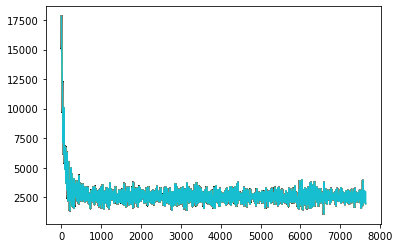

In [541]:
regression3e = LinearRegression(df3.values[:,0:-1], df3.values[:,-1],Lambda = 0.001 ,lr = 0.0007, tol = 0.0001, maxIt = 1500, sgd=True,reg=True ,error=None)
regression3e.fit()